# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [278]:
sinasc = pd.read_csv('sinasc.csv')
print(sinasc.shape)
sinasc.head()

(26925, 12)


,Unnamed: 0,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,SEXO,PESO
0,0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,3685
1,1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Feminino,3055
2,2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,Feminino,3460
3,3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Feminino,2982
4,4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Feminino,3310


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [279]:
def status_apgar(valor):
    valor = int(valor)
    status = None

    if (valor >= 8) & (valor <= 10):
        status = 'normal'
    elif (valor >= 6) & (valor <= 7):
        status = 'asfixia leve'
    elif (valor >= 4) & (valor <= 5):
        status = 'asfixia moderada'
    else:
        status = 'asfixia severa'
    
    return status

sinasc['status_apgar5'] = sinasc['APGAR5'].apply(status_apgar)

sinasc.head(2)

,Unnamed: 0,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,SEXO,PESO,status_apgar5
0,0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,3685,normal
1,1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Feminino,3055,normal


In [280]:
sinasc.columns

Index(['Unnamed: 0', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE',
       'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5', 'SEXO',
       'PESO', 'status_apgar5'],
      dtype='object')

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecat

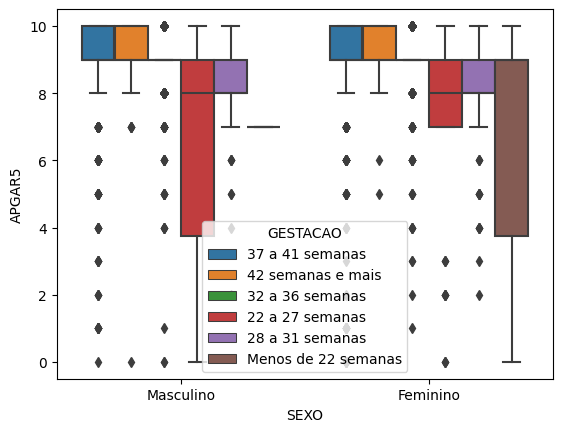

In [281]:
ax = sns.boxplot(data = sinasc, y="APGAR5", x="SEXO", orient="v", hue='GESTACAO')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [282]:
freq = pd.crosstab(sinasc['APGAR5'], sinasc['GESTACAO'])
freq.head(5)

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,6,1,1
1.0,0,0,2,22,0,0
2.0,8,2,2,5,0,1
3.0,6,1,2,6,0,0
4.0,1,5,8,9,0,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [283]:
freq_apgar5 = round((freq.div(freq.sum(axis = 1), axis = 0) * 100), 2)
freq_apgar5.head(5)

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,41.18,0.00,11.76,35.29,5.88,5.88
1.0,0.00,0.00,8.33,91.67,0.00,0.00
2.0,44.44,11.11,11.11,27.78,0.00,5.56
3.0,40.00,6.67,13.33,40.00,0.00,0.00
4.0,4.35,21.74,34.78,39.13,0.00,0.00


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='APGAR5'>

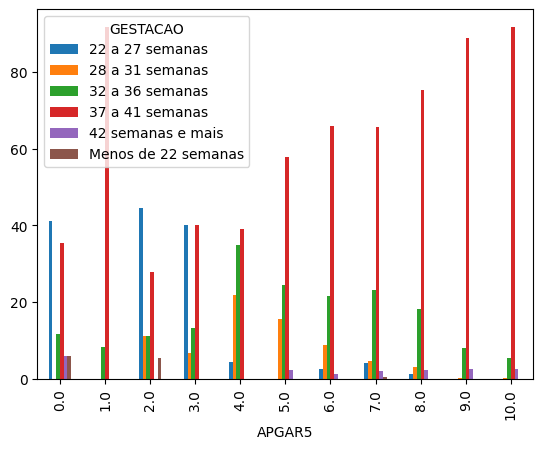

In [284]:
freq_apgar5.plot.bar()

##### `Sim, para que o APGAR5 seja seguro é melhor que ocorra entre 37 e 41 semanas`

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecat

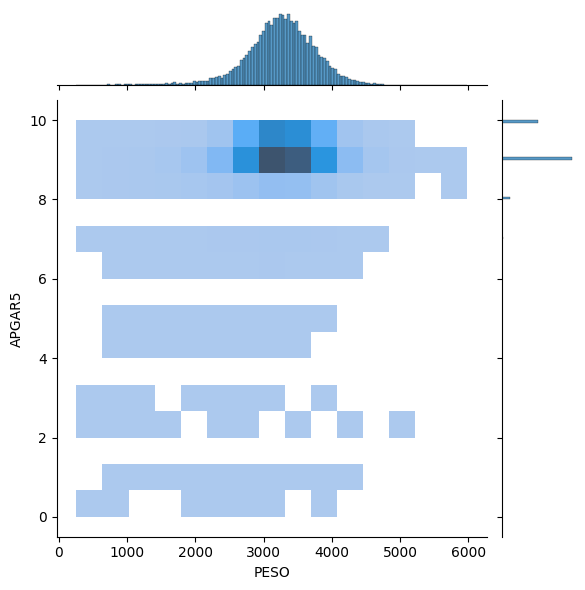

In [285]:
sns.jointplot(x = 'PESO'
              , y = 'APGAR5'
              , data = sinasc
              , kind="hist"
              , bins = [15, 15])

##### Podemos dizer que há uma tendência de que bebês com peso ao nascer entre 3000 a 4000 gramas tendem a ter um escore APGAR mais alto. Porém outros fatores podem estar influenciando este resultado

`(correlação não implica causalidade)`